# Biblioteca Musical - Atividade de Validação de Conhecimentos

A ideia é explorar os recursos apreendidos durante os cursos feitos até então e ter um projeto
base de referência para projetos futuros.

In [1]:
#imports
#!pip install graphviz
import pandas as pd
#!pip install folium
import folium
import seaborn as srn
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
#print(plt.style.available)
#Treinando um algoritmo
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#carregando dados como dataframe

album = pd.read_csv('ALBUM.csv')

In [3]:
#Verificando nulos
albumNulos = pd.isnull(album["ANO"])
albumNulos

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: ANO, Length: 100, dtype: bool

In [4]:
album.head()

,ID_ALBUM,NOME,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
0,1,Heaven and Hell,39,8,5.0,4.3,1,NaN
1,2,Somewhere in Time,51,8,5.0,4.2,2,NaN
2,3,A Tear in the Fabric of Life,21,6,4.5,4.0,3,NaN
3,4,Quarters!,40,4,4.5,3.7,4,NaN
4,5,Walk Among Us,24,13,5.0,4.3,5,NaN


In [5]:
artista = pd.read_csv('ARTISTA.csv')
artista.head()

,ID_ARTISTA,NOME,GENERO,PAIS,QTD_MEMBROS
0,1,Black Sabbath,Heavy Metal,GB,4
1,2,Iron Maiden,Heavy Metal,GB,6
2,3,Knocked Loose,Hardcore,US,5
3,4,King Gizzard and the Lizard Wizard,Rock Psicodélico,AU,6
4,5,Misfits,Punk,US,5


In [6]:
#removendo valores NA
mediana = album['ANO'].median()
mediana

1992.0

In [7]:
#opitei por usar a mediana para substuir valores NA na coluna ANO // Procurar como substituir só na coluna
album = album.fillna(value=mediana)
album

,ID_ALBUM,NOME,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
0,1,Heaven and Hell,39,8,5.0,4.3,1,1992.0
1,2,Somewhere in Time,51,8,5.0,4.2,2,1992.0
2,3,A Tear in the Fabric of Life,21,6,4.5,4.0,3,1992.0
3,4,Quarters!,40,4,4.5,3.7,4,1992.0
4,5,Walk Among Us,24,13,5.0,4.3,5,1992.0
...,...,...,...,...,...,...,...,...
95,96,Brave New World,67,10,4.5,4.1,2,2000.0
96,97,A Matter of Life and Death,72,10,4.5,3.8,2,2006.0
97,98,The Final Frontier,72,10,4.0,3.5,2,2010.0
98,99,The Book of Souls,92,11,3.5,3.8,2,2015.0


In [8]:
#Convertendo a coluna ano para inteiro
album['ANO'] = album['ANO'].astype(int)

In [9]:
#resumo dos dataframe artista
artista.describe()

,ID_ARTISTA,QTD_MEMBROS
count,20.00000,20.000000
mean,10.50000,4.400000
std,5.91608,1.818038
min,1.00000,1.000000
25%,5.75000,4.000000
50%,10.50000,4.000000
75%,15.25000,5.000000
max,20.00000,9.000000


In [10]:
#resumo dos dataframe album
album.describe()

,ID_ALBUM,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,47.560000,10.530000,4.150000,3.872000,10.560000,1993.430000
std,29.011492,12.017933,3.652742,0.729951,0.500521,6.302669,14.955999
min,1.000000,21.000000,4.000000,1.500000,2.500000,1.000000,1967.000000
25%,25.750000,40.000000,8.000000,4.000000,3.500000,4.750000,1981.750000
50%,50.500000,45.000000,10.000000,4.250000,3.900000,12.000000,1992.000000
75%,75.250000,53.250000,12.000000,4.500000,4.300000,16.000000,2005.250000
max,100.000000,92.000000,26.000000,5.000000,4.600000,20.000000,2021.000000


In [11]:
#testando o uso de slices 
album[10:35]

,ID_ALBUM,NOME,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
10,11,Individual Thought Patterns,40,10,4.5,4.3,7,1992
11,12,Symbolic,50,9,5.0,4.6,7,1992
12,13,Black Sabbath,42,8,5.0,4.4,1,1992
13,14,Paranoid,41,8,5.0,4.5,1,1970
14,15,Master of Reality,34,9,5.0,4.5,1,1971
15,16,Vol.4,42,10,5.0,4.0,1,1972
16,17,Sabbath Bloody Sabbath,42,8,5.0,4.2,1,1973
17,18,Born Again,41,9,2.0,2.7,1,1983
18,19,Iron Maiden,37,8,3.5,4.1,2,1980
19,20,Killers,38,10,3.5,4.0,2,1981


In [12]:
album[album['ANO'] > 2000]

,ID_ALBUM,NOME,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
30,31,Jane Doe,45,12,4.5,4.4,9,2001
31,32,Axe to Fall,42,13,4.0,4.1,9,2009
32,33,Bloodmoon: I,58,11,3.5,3.7,9,2021
38,39,Twilight of the Thunder Gods,43,10,4.0,3.9,11,2008
39,40,Surtur Rising,52,11,4.0,3.6,11,2011
40,41,Deceiver of the Gods,47,10,4.0,3.5,11,2013
41,42,Jomsviking,51,11,3.0,3.5,11,2016
42,43,Berserker,56,12,3.0,3.0,11,2019
46,47,Anthens of Rebellion,43,13,4.0,3.5,12,2003
47,48,Doomsday Machine,49,11,4.0,3.6,12,2005


In [13]:
#Procurar como usar duas condições no slice
album[album['MEDIA_SPUT'] > 4.5]

,ID_ALBUM,NOME,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
11,12,Symbolic,50,9,5.0,4.6,7,1992
75,76,Wish You Were Here,44,5,5.0,4.6,17,1975
76,77,The Dark Side of the Moon,42,10,5.0,4.6,17,1973
80,81,In the Court of the Crimson King,44,5,5.0,4.6,18,1969


In [14]:
#Localizando dados no dataframe
album.loc[[1]]

,ID_ALBUM,NOME,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
1,2,Somewhere in Time,51,8,5.0,4.2,2,1992


In [15]:
album.loc[[1,2]]

,ID_ALBUM,NOME,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
1,2,Somewhere in Time,51,8,5.0,4.2,2,1992
2,3,A Tear in the Fabric of Life,21,6,4.5,4.0,3,1992


In [16]:
album.loc[1:8]

,ID_ALBUM,NOME,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
1,2,Somewhere in Time,51,8,5.0,4.2,2,1992
2,3,A Tear in the Fabric of Life,21,6,4.5,4.0,3,1992
3,4,Quarters!,40,4,4.5,3.7,4,1992
4,5,Walk Among Us,24,13,5.0,4.3,5,1992
5,6,Fine Line,46,12,4.5,3.4,6,1992
6,7,Virtual XI,53,8,1.5,2.5,2,1992
7,8,Scream Bloody Gore,37,10,4.5,3.9,7,1992
8,9,Spiritual Healing,42,8,4.0,3.9,7,1992


In [17]:
#Traz do primeiro ao quinto dado da última coluna
album.iloc[0:5,-1]

0    1992
1    1992
2    1992
3    1992
4    1992
Name: ANO, dtype: int64

In [18]:
#Utilizando a função Unique - Retorna valores únicos
album['MINHA_NOTA'].unique()

array([5. , 4.5, 1.5, 4. , 2. , 3.5, 3. , 2.5])

In [19]:
#Ordenando pelas maiores notas do Sputinik
albumOrdenadoNotaSput = album.sort_values(by='MEDIA_SPUT',ascending=False)
albumOrdenadoNotaSput

,ID_ALBUM,NOME,TEMPO_DURACAO,QTD_FAIXAS,MINHA_NOTA,MEDIA_SPUT,ID_ARTISTA,ANO
11,12,Symbolic,50,9,5.0,4.6,7,1992
80,81,In the Court of the Crimson King,44,5,5.0,4.6,18,1969
75,76,Wish You Were Here,44,5,5.0,4.6,17,1975
76,77,The Dark Side of the Moon,42,10,5.0,4.6,17,1973
14,15,Master of Reality,34,9,5.0,4.5,1,1971
...,...,...,...,...,...,...,...,...
25,26,The X Factor,71,11,4.5,2.8,2,1995
49,50,Will to Power,53,13,2.5,2.7,12,2017
17,18,Born Again,41,9,2.0,2.7,1,1983
93,94,"I, the Mask",50,12,3.5,2.6,20,2019


In [20]:
#Usando value counts - Mostra a fequência de cada elemento
album['QTD_FAIXAS'].value_counts()


10    17
8     16
12    13
13    10
11    10
9      7
5      6
6      5
14     5
17     3
4      2
16     2
18     1
7      1
24     1
26     1
Name: QTD_FAIXAS, dtype: int64

In [21]:
#album.groupby(['QTD_FAIXAS']).mean()
#album.groupby(level=0).mean()
#É possível ver as estatístias da minha nota por artista
album.groupby(['ID_ARTISTA'])['MINHA_NOTA'].agg(['max','min','mean','median'])

,max,min,mean,median
ID_ARTISTA,,,,
1,5.0,2.0,4.562500,5.0
2,5.0,1.5,3.966667,4.0
3,4.5,4.5,4.500000,4.5
4,4.5,4.5,4.500000,4.5
5,5.0,4.5,4.625000,4.5
6,4.5,4.5,4.500000,4.5
7,5.0,4.0,4.600000,4.5
8,5.0,5.0,5.000000,5.0
9,4.5,3.5,4.000000,4.0


In [22]:
#É possível ver as estatístias da minha nota por artista
album.groupby(['ID_ARTISTA'])['MEDIA_SPUT'].agg(['max','min','mean','median'])

,max,min,mean,median
ID_ARTISTA,,,,
1,4.5,2.7,4.075000,4.25
2,4.5,2.5,3.806667,4.00
3,4.0,4.0,4.000000,4.00
4,3.7,3.7,3.700000,3.70
5,4.4,3.4,3.900000,3.90
6,3.4,3.4,3.400000,3.40
7,4.6,3.9,4.240000,4.30
8,4.4,4.4,4.400000,4.40
9,4.4,3.7,4.066667,4.10


In [23]:
#Substituindo valores com função map
albumMap = album
banda = {1:'Black Sabbath', 2:'Iron Maiden'}
albumMap['ID_ARTISTA'].map(banda).head()

0    Black Sabbath
1      Iron Maiden
2              NaN
3              NaN
4              NaN
Name: ID_ARTISTA, dtype: object

In [24]:
#Função Pivot - Ainda preciso entender melhor como utilizar
albumMap.pivot(index='ID_ARTISTA', columns='ID_ALBUM', values='MINHA_NOTA')


ID_ALBUM,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
ID_ARTISTA,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,4.5,4.0,3.5,3.5
3,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
artista.groupby(['GENERO']).count() 


,ID_ARTISTA,NOME,PAIS,QTD_MEMBROS
GENERO,,,,
Black Metal,1,1,1,1
Death Metal,1,1,1,1
Death Metal Melódico,3,3,3,3
Djent,1,1,1,1
Grunge,1,1,1,1
Hardcore,1,1,1,1
Heavy Metal,2,2,2,2
Math Rock,1,1,1,1
Metalcore,1,1,1,1


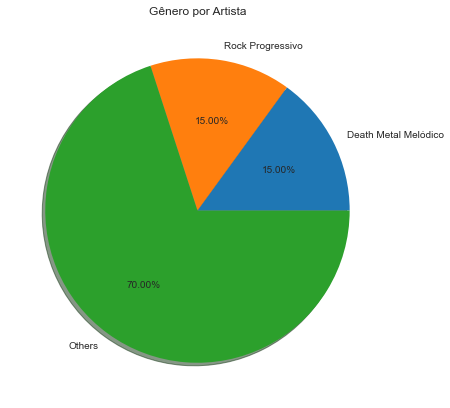

In [26]:
#Qual gênero mais ouvido por artista, desta vez separado pelos 3 maiores
#Pensar numa ideia de mostrar menos itens

values = artista['GENERO'].value_counts().keys().tolist()
counts = artista['GENERO'].value_counts().tolist()

othersValues = 'Others'
othersCounts = counts[2:]

values = values[0:3]
counts = counts[0:3]

counts.append(sum(othersCounts))
values.append(othersValues)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize =(10, 7)) 
plt.title("Gênero por Artista")
plt.pie(counts, labels = values, autopct='%.2f%%', shadow = True) 

plt.show() 

In [27]:
#Donut Chart
my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(counts2, labels=values2, autopct='%1.1f%%',
            startangle=45, labeldistance=1.25)
plt.axis('equal')
plt.gca().add_artist(my_circle)
            
plt.show()

NameError: name 'counts2' is not defined

In [ ]:
#fazendo o merge dos dois dataframes
merge = album.merge(artista, on='ID_ARTISTA', how = 'outer')

merge.rename(columns={'NOME_x': 'NOME_ALBUM', 
                           'NOME_y': 'NOME_BANDA'}, inplace=True)

merge.to_csv("MERGE.csv")

In [ ]:
#Qual gênero mais ouvido por álbum
#Gráfico de barras horizontal devido a quantidade de itens
label = merge['GENERO'].value_counts().keys().tolist()
freq = merge['GENERO'].value_counts().tolist()


#plot do gráfico
#Funcão reverse inverte a lista, permitindo que os maiores valores fiquem acima no gráfico
freq.reverse()
label.reverse()

#Faz o slicing dos últimos 7 elementos
freq = freq[-7:]
label = label[-7:]

print(freq)
print('\n\n', label)
plt.barh(label, freq)
plt.xticks(rotation = 70)
plt.show()
#list(albumMap['GENERO'])



In [ ]:
#Gráfico de Mapa
#Manipulando dados para gerar o mapa

#Inserindo a longitude e a latitude ao dataframe trabalhado
paises = pd.read_csv('latitude_longitude.csv', usecols = [0, 1, 2, 3])
paises.rename(columns={'country_code': 'PAIS'}, inplace=True)
#paises['PAIS'].replace('UK', 'GB')
merge.replace('UK', 'GB')
merge = merge.merge(paises, on='PAIS', how = 'left')

#Verifica se algum valor está faltndo
merge.isnull().values.any()
merge

In [ ]:
from folium import plugins
mapa = folium.Map(location = [-0, -0], zoom_start = 1)
coordenadas = []
for lat, lng in zip(merge.latitude.values, merge.longitude.values):
    coordenadas.append([lat, lng])   
#coordenadas

mapa.add_child(plugins.HeatMap(coordenadas))

Revisar o gráfico de linhas, fazer com a função do pandas gerou o mesmo problema 

In [ ]:
#Albuns por ano


#plt.xlabel("Ano")  
#plt.ylabel("Quantidade de Álbuns")  
#plt.title("Quantidade de Álbuns por Ano")
agrupado = merge.groupby(['ANO']).size()
#agrupado.plot.line(color = 'blue')
srn.lineplot(data=agrupado)

Pensar numa forma melhor de plotar as médias das notas

In [ ]:
#Albuns por ano
label = merge['NOME_ALBUM'].values
freqM = merge['MINHA_NOTA'].values
freqS = merge['MEDIA_SPUT'].values

#Esse fica consideravelmente melhor no Power BI


#Por algum motivo adicionar uma vírgula faz a legenda funcionar
plt.figure( figsize=(70, 18)) 
ax1, = plt.plot(label, freqM, marker = 'o') 
ax2, = plt.plot(label, freqS, marker = 'o') 

#Resolvendo o plot das linhas médias
plt.hlines(y = freqM.mean(), xmin = 0, xmax = 100, color = 'g')
plt.hlines(y = freqS.mean(), xmin = 0, xmax = 100, color = 'r')

#plt.plot(label, freqM.mean()) 
plt.legend([ax1, ax2], ['Notas Média','Notas Sputinik','Minha Média', 'Média Sputink'])
plt.xlabel("Ano")  
plt.ylabel("Quantidade de Álbuns")  
plt.xticks(rotation = 75)
plt.title("Quantidade de Álbuns por Ano")  
plt.show() 

In [ ]:
#Resumo dos dados usados a seguir
print('Minhas Notas: ')
merge['MINHA_NOTA'].describe()

In [ ]:
#Histograma das minhas notas
#Histograma e Boxplot são mt melhores por aqui!!
#Ficaram iguais ao do Power BI

#merge.hist(column = 'MINHA_NOTA', bins = 5)
#plt.show()
#Vai ser descontinuado 

srn.histplot(data =merge['MINHA_NOTA'], kde = True, bins = 8).set_title('Minha Nota')

In [ ]:
#Histograma das notas Sputinik


#merge.hist(column = 'MEDIA_SPUT', bins = 5)
#plt.show()

srn.histplot(data =merge['MEDIA_SPUT'], kde = True, bins = 8).set_title('Média Sputinik')

Revisar os boxplots

In [ ]:
#Boxplot das minhas notas

merge.boxplot(column='MINHA_NOTA')
plt.show()
srn.boxplot(x =merge['MINHA_NOTA'], y = merge['NOME_BANDA']).set_title('Minha Nota')

In [ ]:
#Boxplot das notas sputinik
merge.boxplot(column='MEDIA_SPUT')
plt.show()
srn.boxplot(x =merge['MEDIA_SPUT'], y = merge['NOME_BANDA']).set_title('Nota Sputinik')

In [ ]:
merge.corr()

In [ ]:
#Correlação
size = 15
corr = merge.corr()    
plot = srn.heatmap(corr, annot = True, fmt=".2f", linewidths=.6)
plot

In [ ]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['ID_ALBUM', 'TEMPO_DURACAO', 'QTD_FAIXAS', 'MEDIA_SPUT', 'ID_ARTISTA', 'ANO', 'QTD_MEMBROS']

# Variável a ser prevista
atrib_prev = ['MINHA_NOTA']

# Criando objetos
X = merge[atributos].values
Y = merge[atrib_prev].values
Y=Y.astype('int')

# Definindo a taxa de split
split_test_size = 0.30
#X
#Y
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [ ]:
#Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(merge.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(merge.index)) * 100))

In [ ]:
#Construindo e treinando o modelo
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Criando o modelo preditivo
modelo_v1 = GaussianNB()

# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

In [ ]:
#Previsões
previsoes = modelo_v1.predict(X_teste)
previsoes

In [ ]:
#Verificando a exatidão do modelo de treino

from sklearn import metrics

predict_train = modelo_v1.predict(X_treino)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, predict_train)))
print()

In [ ]:
#verificando exatidão no modelo de teste
predict_test = modelo_v1.predict(X_teste)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_test)))
print()

In [ ]:
#salvando o modelo
import pickle
filename = 'moelo_treinado.sav'
pickle.dump(modelo_v1, open(filename, 'wb'))

In [ ]:
#Utilizando o modelo
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[18].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))

#print(Y_teste)
print(resultado1)
print(resultado2)

In [ ]:
#Selecionando os Atributos em busca de melhorar a precisão do modelo
#Utilizando do algoritmo Extra Trees Classfifier para descobrir a importância dos atributos
floresta = ExtraTreesClassifier()
floresta.fit(X_treino, Y_treino.ravel())
importancias = floresta.feature_importances_
importancias

In [ ]:
#Usando subconjunto dos mais relevantes para os dados de treino
X_treino2 = X_treino[:, [0,1,2,3,5]]
X_teste2 = X_teste[:, [0,1,2,3,5]]

In [ ]:
modelo_v2 = GaussianNB()
modelo_v2.fit(X_treino2, Y_treino.ravel())
previsoes2 = modelo_v2.predict(X_teste2)
taxa_acerto = accuracy_score(Y_teste, previsoes2)
taxa_acerto

# Resultado
Apesar da seleção dos atributos, o modelo V2 não é melhor que o modelo V1. 
## O que fazer agora? 

Buscar novos agoritmos ou Aumentar o volume de dados no dataset. 

Todas as variáveis usadas são numéricas, então o tratamento de categóricas não é necessário.

In [ ]:
#Testando a criação do modelo com árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_treino2, Y_treino.ravel())

In [ ]:
#Exportação da Árvore de Decisão .dot
export_graphviz(arvore, out_file = 'tree.dot')

In [ ]:
previsoes2 = arvore.predict(X_teste2)
previsoes2

In [ ]:
confusao = confusion_matrix(Y_teste, previsoes2)
confusao

In [ ]:
taxa_acerto = accuracy_score(Y_teste, previsoes2)
taxa_acerto

In [ ]:
#Random Forest
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treino2, Y_treino.ravel())

In [ ]:
previsoes3 = floresta.predict(X_teste2)
previsoes3

In [ ]:
consfusao = confusion_matrix(Y_teste, previsoes3)
confusao

In [ ]:
# Accuracy nos dados de treino
# Ovefittin? 
predict_train = floresta.predict(X_treino2)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, predict_train)))
print()

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, previsoes3)))
print()